<a href="https://colab.research.google.com/github/MarceloClaro/QuantumDeepClassifier/blob/main/Notebook_Perceptron_Classicos_Quanticos_(Estudo_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

# 📘 Notebook Didático — Perceptron (Clássicos) **e** Perceptron Quântico (TFQ) — Íris 🌸

Autor: **Prof. Marcelo Claro** · Data: **2025-08-03 14:16**

Este notebook foi gerado automaticamente e está **pronto para o Google Colab**.
Inclui **baselines clássicos** (Perceptron, **SVM Linear**, **Naive Bayes**) e um
**classificador quântico** usando **TensorFlow Quantum (TFQ + Cirq)**.

---

## 🎯 Objetivos

1. Explicar o **Perceptron** do zero com analogias, fórmulas e gráficos.
2. Treinar e comparar **Perceptron / SVM Linear / Naive Bayes** (clássicos).
3. Construir um **Perceptron Quântico** (PQC) em **TFQ** com **camadas/portas configuráveis**.
4. Incluir **k-fold** e **busca de hiperparâmetros** (grid pequeno) em **SVM** e **TFQ**.
5. Visualizar **fronteiras de decisão**, **ROC/AUC** e **casos limítrofes**.

> Público-alvo: estudantes de **9 a 16 anos** (linguagem simples + emojis) **e** banca técnica (cálculos e métricas).
---
# 📘 Notebook Didático — Perceptron (Clássico) — Seção 1 com Figuras
Autor: **Você** · Data: **2025-08-03 15:26**

Este arquivo contém a **Seção 1** completa (explicação para leigos) com **figuras embutidas** (base64) —
não precisa baixar imagens separadas. Se estiver no **Colab**, use *Arquivo → Salvar uma cópia no Drive*.

---

## 1) O que é um Perceptron? 🧠🔌

**Metáfora simples (9–16 anos)**  
Imagine um **interruptor inteligente**. Ele recebe dois números — aqui, **comprimento da pétala** e **largura da pétala** da flor — multiplica cada um pela sua **importância** (os **pesos** `w1` e `w2`), soma tudo e adiciona um **ajuste** (o **bias** `b`).  
Se o resultado for **grande o suficiente**, ele **liga (1 ⇒ Setosa)**; se não, **desliga (0 ⇒ Não-Setosa)**.

**Fórmulas centrais (modelo linear + limiar)**

$$
z = w_1 x_1 + w_2 x_2 + b
\quad\Rightarrow\quad
\hat{y}=
\begin{cases}
1 & \text{se } z \ge 0\\
0 & \text{se } z < 0
\end{cases}
$$

> 🔎 **Lembrete:** neste material usamos **ponto decimal** (ex.: 1.4) para facilitar contas com calculadora e compatibilidade com código.

---

Perfeito! Aqui está o trecho **pronto para colar em uma célula de Markdown do Google Colab/Jupyter**. Ele usa **LaTeX** no formato suportado pelo Colab (inline com `\( ... \)` e display com `\[ ... \]`). É só copiar e colar:

---

### 1.1) Números, pesos e “importância” 🎒

Cada flor tem **dois números** (características):

* $x_1$: **comprimento** da pétala (*PetalLength*);
* $x_2$: **largura** da pétala (*PetalWidth*).

O Perceptron guarda **quanto cada número importa** (os **pesos**):

* $w_1$ é a importância de $x_1$;
* $w_2$ é a importância de $x_2$.

> **Ideia:** se $w_1$ é **grande e positivo** ($w_1 > 0$), flores com pétalas **mais compridas** (valores maiores de $x_1$) “puxam” a decisão para a classe **1**.
> Se $w_1$ é **grande e negativo** ($w_1 < 0$), elas “puxam” para a classe **0**.
> O mesmo raciocínio vale para $w_2$ e os valores de $x_2$.

*(Opcional — forma vetorial para referência técnica)*

$$
\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}, \quad
\mathbf{w} = \begin{bmatrix} w_1 \\ w_2 \end{bmatrix}, \quad
 z \;=\; \mathbf{w}^\top \mathbf{x} + b.
$$


---

### 1.2) O “ajuste fino” (bias) 🔧

Além dos pesos, existe um **botão de ajuste** chamado **bias** \(b\).

- Ele empurra a decisão **para um lado** ou **para o outro** sem depender de \(x_1\) nem de \(x_2\).
- Geometricamente, \(b\) **move a linha de decisão** para cima/baixo (ou esquerda/direita).

---

### 1.3) Somar com peso: a “nota final” \(z\) 🧮

O Perceptron calcula uma **soma ponderada** (cada número multiplicado pela sua importância) e adiciona o bias:

\[
\underbrace{z}_{\text{nota}} \;=\; w_1\,x_1 \;+\; w_2\,x_2 \;+\; b
\]

- Se essa **nota \(z\)** for **alta o suficiente** (\(z \ge 0\)), o Perceptron **liga**: \(\hat{y}=1\).
- Se for **abaixo de zero** (\(z < 0\)), ele **desliga**: \(\hat{y}=0\).

---

### 1.4) Exemplo numérico (bem concreto) ✏️

Vamos usar **valores-teste**:
- \(w_1 = 0.5\), \(w_2 = -0.6\), \(b = -0.1\)
- Flor **A**: \(x_1 = 1.4\) (cm), \(x_2 = 0.2\) (cm)  
- Flor **B**: \(x_1 = 4.7\) (cm), \(x_2 = 1.4\) (cm)

**Flor A (1.4; 0.2)**  
1) Multiplicações:  
- \( w_1 \cdot x_1 = 0.5 \times 1.4 = 0.70 \)  
- \( w_2 \cdot x_2 = -0.6 \times 0.2 = -0.12 \)

2) Soma com \(b\):  
- \( z = 0.70 + (-0.12) + (-0.10) = 0.48 \)

3) Decisão:  
- Como \( z = 0.48 \ge 0\), **\(\hat{y} = 1\)** (Setosa).

**Flor B (4.7; 1.4)**  
1) Multiplicações:  
- \( 0.5 \times 4.7 = 2.35 \)  
- \( -0.6 \times 1.4 = -0.84 \)

2) Soma com \(b\):  
- \( z = 2.35 - 0.84 - 0.10 = 1.41 \)

3) Decisão:  
- Como \( z = 1.41 \ge 0\), **\(\hat{y} = 1\)** (Setosa).

> 👧 **Intuição:** cada multiplicação é “quantos pontos” aquela característica dá. No final, somamos os pontos e comparamos com zero. Passou de zero? É 1. Não passou? É 0.

---

### 1.5) Geometria: por que isso é uma **reta**? 📏

A condição de “empate” (a **fronteira** entre as classes) é quando \( z = 0 \):

\[
w_1\,x_1 + w_2\,x_2 + b = 0
\]

Se \( w_2 \neq 0 \), isolando \(x_2\):

\[
x_2 \;=\; -\frac{w_1}{w_2}\,x_1 \;-\; \frac{b}{w_2}
\]

- **Inclinação**: \( m = -\dfrac{w_1}{w_2} \)  
- **Intercepto**: \( c = -\dfrac{b}{w_2} \)

Com \( w_1=0.5,\; w_2=-0.6,\; b=-0.1 \):  
- \( m = -\frac{0.5}{-0.6} = +0.8333 \)  
- \( c = -\frac{-0.1}{-0.6} = -0.1667 \)

Logo: \( \boxed{x_2 \approx 0.8333\,x_1 - 0.1667} \).

**Figura 1 — Pontos reais e a reta \(z=0\)**  
<p>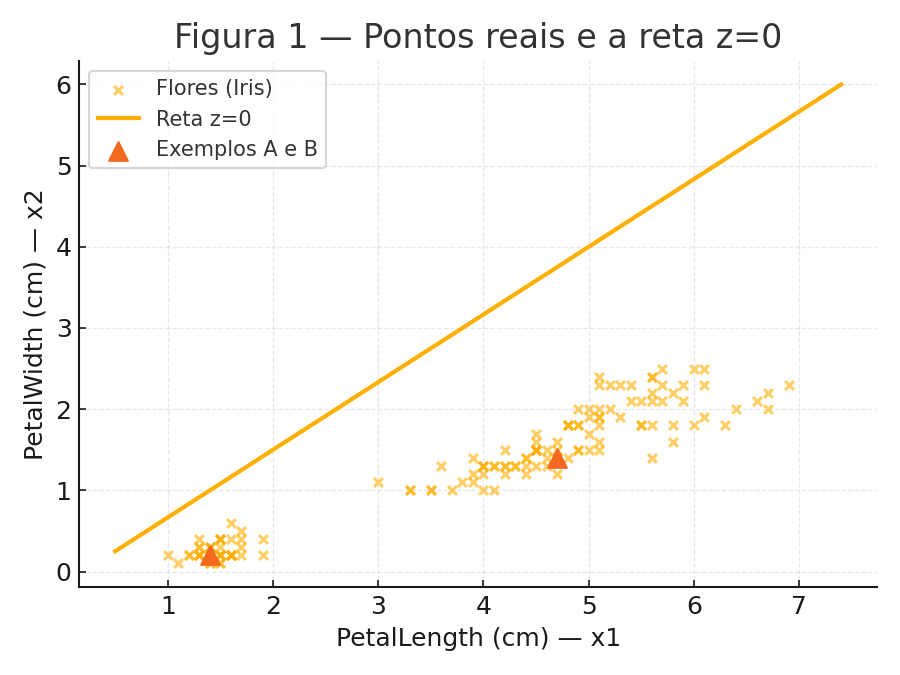</p>

#### 1.5.1) Regiões de decisão (z≥0 vs z<0)
Um lado da reta é onde \(z \ge 0\) (o Perceptron responde **1**), e o outro é onde \(z < 0\) (responde **0**).

**Figura 2 — Regiões de decisão**  
<p>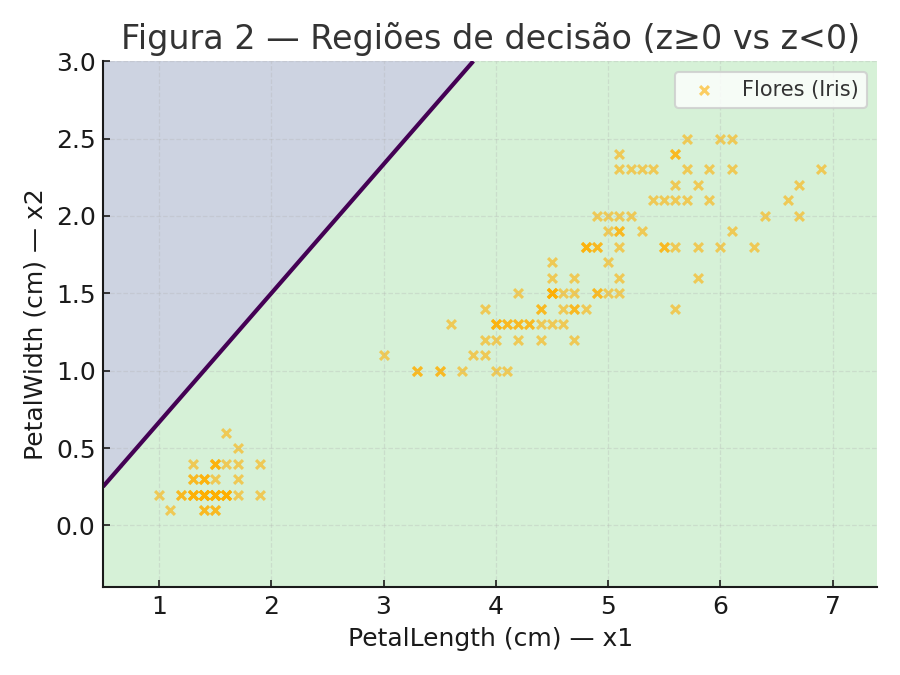</p>

---

### 1.6) “Distância ao muro”: **margem** 📏➡️🧱

O valor \(z\) também indica **quão longe** o ponto está da reta \(z=0\).  
A **margem aproximada** (distância *assinada* do ponto à reta) é:

\[
\text{margem} \;\approx\; \frac{z}{\|w\|} \quad\text{onde}\quad \|w\| = \sqrt{w_1^2 + w_2^2}
\]

1) Compute \(\|w\|\) com os valores do exemplo:  
- \( w_1^2 = (0.5)^2 = 0.25 \), \( w_2^2 = (-0.6)^2 = 0.36 \)  
- Soma: \( 0.25 + 0.36 = 0.61 \)  
- Raiz: \( \|w\| = \sqrt{0.61} \approx 0.7810 \)

2) Margem da **flor A** (\(z=0.48\)):  
\(\text{margem}_A \approx 0.48 / 0.7810 \approx 0.615\)

3) Margem da **flor B** (\(z=1.41\)):  
\(\text{margem}_B \approx 1.41 / 0.7810 \approx 1.806\)

**Leitura:** a flor B está **mais longe** da linha do que a A (decisão mais fácil).

---

### 1.7) “Confiança” didática (só para entender) 🟡

Para dar uma **noção** (⚠️ **não é probabilidade calibrada**), usamos:

\[
\text{confiança} \;\approx\; \sigma(|z|) \;=\; \frac{1}{1 + e^{-|z|}}
\]

- Se \(|z|\) é **pequeno** (ponto perto da reta), \(\sigma(|z|)\) fica **perto de 0.5** ⇒ **dúvida**.  
- Se \(|z|\) é **grande**, \(\sigma(|z|)\) fica **perto de 1** ⇒ **convicção**.

**Com os nossos \(z\):**  
- Flor A: \(|z|=0.48\) ⇒ \(e^{-0.48}\approx 0.619\), \(1+0.619\approx 1.619\), \(\sigma\approx 1/1.619\approx 0.618\) (**61.8%**).  
- Flor B: \(|z|=1.41\) ⇒ \(e^{-1.41}\approx 0.244\), \(1+0.244\approx 1.244\), \(\sigma\approx 1/1.244\approx 0.804\) (**80.4%**).

**Figura 3 — Indicador didático de confiança: \(\sigma(|z|)\)**  
<p>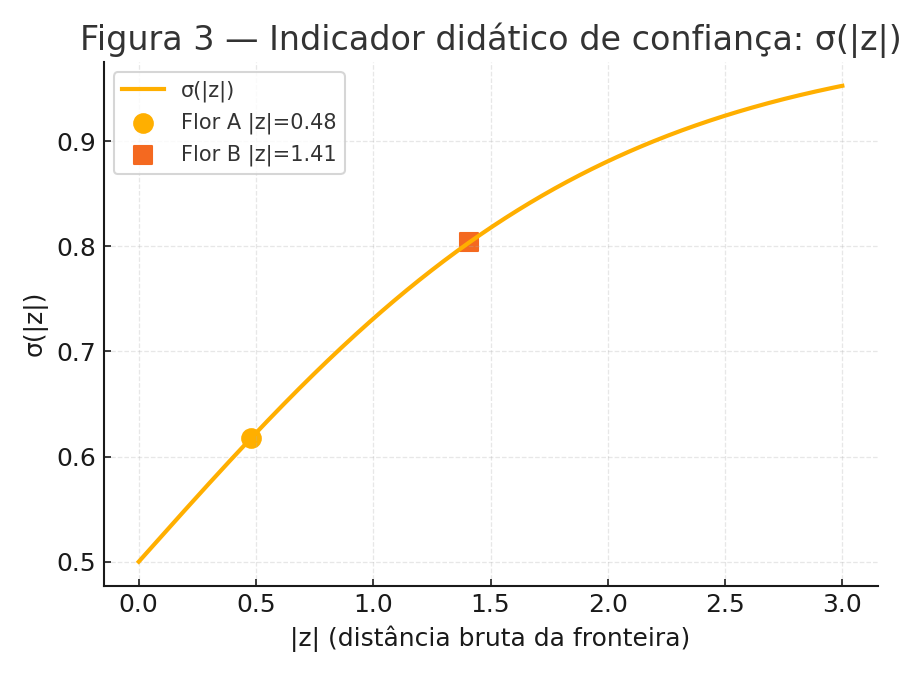</p>

---

### 1.8) Como o Perceptron **aprende** (ideia) 🛠️📈

Quando o Perceptron **erra** (prevê 0 mas o certo era 1, ou vice-versa), ele **ajusta** pesos e bias para **reduzir** o erro na próxima vez:

\[
w \;\leftarrow\; w + (y - \hat{y})\,x
\qquad\text{e}\qquad
b \;\leftarrow\; b + (y - \hat{y})
\]

- Se \(y=\hat{y}\) (acertou), nada muda.  
- Se \(y-\hat{y}=1\) (disse 0, mas era 1), a reta é **puxada** para incluir esse ponto no lado 1.  
- Se \(y-\hat{y}=-1\) (disse 1, mas era 0), a reta é **empurrada** para o outro lado.

---

### 1.9) Mini-resumo (para colar na cabeça) 🧠✨

- **Cálculo:** \(z = w_1x_1 + w_2x_2 + b\) → se \(z\ge 0\) então 1, senão 0.  
- **Reta:** \(w_1x_1 + w_2x_2 + b = 0\) divide o plano em **duas regiões**.  
- **Margem:** \(\text{margem} \approx z/\|w\|\) mede **quão longe** do “muro” o ponto está.  
- **Confiança didática:** \(\sigma(|z|)\) cresce quando o ponto está **longe da reta**.

---

### 1.10) Exercício rápido (treine o olhar) 👀📝

Com \(w_1=1\), \(w_2=-2\), \(b=0.5\):

1. Calcule \(z\) e a classe prevista \(\hat{y}\) para \(x=(1.4,\,0.2)\).  
2. Repita para \(x=(4.7,\,1.4)\).  
3. Escreva a **reta** \(z=0\) na forma \(x_2 = m\,x_1 + c\).  
4. Compare \(|z|\) dos dois pontos: qual está mais “convincente” para o modelo?

> Dica: \(\sigma(|z|)=1/(1+e^{-|z|})\) ajuda a ver quem está **mais longe** da fronteira.

---

## 2) De onde veio? (História resumida) 📜

* **1957 — Frank Rosenblatt**: propôs o **Perceptron**, com hardware experimental (Mark I Perceptron).
* **1969 — Minsky & Papert**: mostraram uma limitação importante: o Perceptron simples **não resolve XOR** (padrões **não** linearmente separáveis).
* **Anos 1980**: volta do interesse com **redes multicamadas** e o **backpropagation**.
* **Hoje**: o Perceptron é a **célula básica** de redes neurais e um excelente modelo didático.

---

## 3) Aprendizado do Perceptron (passo a passo) 🛠️

**Regra clássica de atualização** (taxa $\eta=1$ aqui):

$$
w \leftarrow w + (y-\hat{y})\,x
\qquad\text{e}\qquad
b \leftarrow b + (y-\hat{y})
$$

* Se acertou ($y=\hat{y}$), **nada muda**.
* Se errou, empurra a **reta** na direção de corrigir o erro.

**Exemplo numérico micro (2 pontos):**

* Estado inicial: $w=(0,0), b=0$.
* Ponto A: $x=(1{,}4,\,0{,}2)$, $y=1$ (Setosa).

  * $z=0\Rightarrow \hat{y}=0$ (errou).
  * Erro $e=y-\hat{y}=1$.
  * Atualiza: $w\leftarrow (0,0) + 1\cdot(1{,}4,0{,}2)=(1{,}4,0{,}2)$; $b\leftarrow 0+1=1$.
* Ponto B: $x=(4{,}7,\,1{,}4)$, $y=0$ (Não-Setosa).

  * $z=1{,}4\cdot 4{,}7 + 0{,}2\cdot 1{,}4 + 1 \approx 8{,}18\Rightarrow \hat{y}=1$ (errou).
  * Erro $e=0-1=-1$.
  * Atualiza: $w\leftarrow (1{,}4,0{,}2) + (-1)\cdot(4{,}7,1{,}4)=(-3{,}3,-1{,}2)$; $b\leftarrow 1-1=0$.
    Repetindo esse **ciclo**, a reta vai se ajustando.

---

## 4) Base Íris 🌸 (e por que só 2 variáveis)

Usamos **PetalLength** ($x_1$) e **PetalWidth** ($x_2$) porque:

* São **muito discriminativas** para separar **Setosa** das demais.
* Permitem **gráficos 2D** (ótimos para aprendizado visual).

Rótulo binário: **1 = Setosa**; **0 = Versicolor/Virginica**.

---

## 5) Métricas & Diagnóstico 📊

* **Matriz de confusão**: TP, TN, FP, FN.
* **Acurácia**: $\frac{TP+TN}{\text{total}}$.
* **Precisão (PPV)**: $\frac{TP}{TP+FP}$.
* **Revocação (TPR)**: $\frac{TP}{TP+FN}$.
* **F1**: média harmônica entre Precisão e Revocação.
* **ROC/AUC**: varre limiares e mede a **separabilidade** entre classes.

**Casos limítrofes** 🟡: confiança perto de 50% ⇒ ponto **perto da fronteira**.

---

## 6) Baselines Clássicos 🧪

### 6.1 Perceptron (scikit-learn)

* Mesmo espírito do Perceptron didático, com **otimizações** e **parâmetros** prontos.

### 6.2 **SVM Linear** ⚖️

* Aprende a **reta de maior margem** entre as classes (ideia de “muro mais distante”).
* Otimiza a **hinge loss** e usa o hiperparâmetro $C$ (troca entre **margem** larga e **punição de erros**).
* Em dados **quase linearmente separáveis** (Íris com pétalas), costuma ser **muito forte**.

### 6.3 **Naive Bayes** 🧮

* Usa o **Teorema de Bayes** supondo **independência** condicional entre atributos.
* Versão Gaussiana (GaussianNB): assume cada classe com **distribuição normal** em cada atributo.
* Rápido, simples, **boa referência** quando os atributos ajudam bem.

---

## 7) Perceptron Quântico (TFQ + Cirq) 🔮

**Ideia para leigos**

* Em vez de trabalhar só com números “clássicos”, usamos **qubits** (como **moedas girando**): podem estar em **superposição** (vários estados ao mesmo tempo) e se **emaranhar** (relacionamento especial entre qubits).

**Como codificamos os dados?**

* Pegamos $x_1, x_2$ e transformamos em **ângulos de rotação** (ex.: $\text{Rx}(\phi), \text{Rz}(\phi)$).
* Isso coloca a informação da flor **no estado do qubit**.

**Camada variacional (o que o modelo “aprende”)**

* Portas com **parâmetros treináveis** (ex.: $\text{Ry}(\theta)$).
* Porta de **emaranhamento** (ex.: **CZ**) conecta qubits.
* No fim, **medimos** um observável (ex.: $Z$) e obtemos um valor em $[-1,1]$.
* Mapeamos para $[0,1]$ com **sigmóide** ⇒ vira **score** para classificar.

**Treino**

* O TFQ calcula **gradientes** analíticos das portas vs. os parâmetros $\theta$.
* Usamos **otimizadores Keras** (ex.: Adam) com **Binary Crossentropy**.

> **Importante**: nosso PQC é **didático** (pequeno). O objetivo aqui é **aprender conceitos**, não bater SVM em performance.

---

## 8) k-Fold & Busca de Hiperparâmetros 🔎

**k-Fold (estratificado)**

1. Divide os dados em **k** partes (dobras).
2. Treina em $k-1$, valida na que sobrou; roda **k** vezes.
3. Faz a **média** das métricas ⇒ avaliação mais **estável**.

**Grid pequeno (exemplos)**

* **SVM**: $C \in \{0{,}1,\,1,\,10\}$.
* **TFQ**: taxa de aprendizado $\in \{0{,}02,\,0{,}01\}$, **épocas** $\in \{30,\,60\}$, 1–2 camadas variacionais.
* Escolhemos a combinação com **melhor média** de validação (AUC/F1/Acc).

---

## 9) Fronteiras de Decisão 🗺️

* Geramos uma **grade 2D** e pedimos pro modelo prever cada ponto.
* Pintamos as regiões (Setosa/Não-Setosa) + mostramos os pontos de **treino** e **teste**.
* Ajuda a **enxergar** quando a separação é **linear** (reta) ou **mais torta** (quando usamos modelos não-lineares).

---

## 10) O que esperar nos resultados? ✅

* Com **pétalas** (comprimento × largura), **Setosa** costuma ficar **bem separada** → acurácia alta.
* **SVM Linear** tende a ser um **baseline vencedor** nesse cenário.
* **Naive Bayes** funciona como **referência rápida**.
* **TFQ** aqui é **didático**: mostra como **codificar dados** em qubits, usar **portas** e **entendimento variacional** — ótimo para **aprender** e **experimentar**.

---

## 11) Boas práticas (para banca) 🧪📐

* **Reprodutibilidade**: fixar `random_state`, detalhar versões de pacotes.
* **Separação Treino/Teste** e/ou **k-fold** estratificado.
* **Métricas** múltiplas (Acc, F1, AUC), não só acurácia.
* **Casos limítrofes**: olhar onde o modelo **“duvida”** ajuda a melhorar coleta/rotulagem.
* **Limitações**: Perceptron/SVM **lineares**; quando as classes misturam-se de forma **não linear**, subir complexidade (kernels, redes profundas, features).

---

## 12) Mini FAQ 🙋‍♀️🙋‍♂️

* **Por que só dois atributos?**
  Para **visualização 2D** e aprendizado intuitivo. Nada impede usar mais atributos.
* **Perceptron resolve todo problema?**
  Não. Só **separa** com **reta**. Para casos **não lineares**, precisamos de **kernel** (SVM) ou **redes com camadas** (não linearidade).
* **Quântico sempre vence o clássico?**
  Não. Hoje é um **campo de pesquisa**. Nosso uso é **educacional** e para **explorar ideias** (superposição, emaranhamento, codificação).

---

> **Resumo em 1 frase:**
> O Perceptron é um **interruptor inteligente** que desenha uma **reta** para separar **Setosa** de **Não-Setosa**; SVM e NB são **referências clássicas** fortes, e o **Perceptron Quântico** mostra como **codificar dados** em **qubits** e **aprender** com circuitos **parametrizados**.

---




## ⚙️ Instalação (Colab) — rode **esta célula** se o ambiente estiver limpo
> Pins compatíveis (TF **2.15.0**, TFQ **0.7.3**, **cirq-core 1.3.0**).  
> Depois de instalar: **Runtime ▸ Restart runtime** (Obrigatório) e volte a executar a partir da próxima seção.

In [1]:
import sys, subprocess

def pip_install(*packages):
    """
    Ex.: pip_install("numpy==1.26.4", "protobuf==3.20.3", "scipy<1.14")
    Usa subprocess sem shell (seguro) e sem aspas internas nos argumentos.
    """
    cmd = [sys.executable, "-m", "pip", "install", "-U", "--quiet", *packages]
    print(">> pip", " ".join(packages))
    subprocess.check_call(cmd)

# (Opcional) Desinstalar pacotes que costumam conflitar
# subprocess.call([sys.executable, "-m", "pip", "uninstall", "-y",
#                  "tf-keras", "tensorflow-text", "torch", "torchvision", "torchaudio"])

# 1) Bases
pip_install("numpy==1.26.4", "protobuf==3.20.3", "scipy<1.14")

# 2) TensorFlow 2.15.x (compatível com TFQ 0.7.3)
pip_install("tensorflow==2.15.0", "tensorflow-io-gcs-filesystem==0.31.0")

# 3) Stack quântico compatível com TFQ 0.7.3
#    (cirq-core 1.3.0 + cirq-google 1.3.0; sympy 1.12 ajuda a evitar conflitos)
pip_install("cirq-core==1.3.0", "cirq-google==1.3.0", "sympy==1.12")
pip_install("tensorflow-quantum==0.7.3")

# 4) Clássicos e gráficos
pip_install("scikit-learn", "matplotlib", "pandas")

print("✅ Instalação concluída. Agora vá em Ambiente de execução > Reiniciar o ambiente.")


>> pip numpy==1.26.4 protobuf==3.20.3 scipy<1.14
>> pip tensorflow==2.15.0 tensorflow-io-gcs-filesystem==0.31.0
>> pip cirq-core==1.3.0 cirq-google==1.3.0 sympy==1.12
>> pip tensorflow-quantum==0.7.3
>> pip scikit-learn matplotlib pandas
✅ Instalação concluída. Agora vá em Ambiente de execução > Reiniciar o ambiente.


In [2]:
import numpy as np
print("NumPy:", np.__version__)          # 1.26.4

import tensorflow as tf
print("TF:", tf.__version__)             # 2.15.0

import importlib.metadata as md
import tensorflow_quantum as tfq
print("TFQ:", tfq.__version__)           # 0.7.3
print("cirq-core:", md.version("cirq-core"))  # 1.3.0


NumPy: 1.26.4
TF: 2.15.0
TFQ: 0.7.2
cirq-core: 1.3.0


## 📦 Importações e checagem de versões

In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.linear_model import Perceptron as SKPerceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
print("TensorFlow:", tf.__version__)

try:
    import cirq, sympy, tensorflow_quantum as tfq
    TFQ_AVAILABLE = True
    print("TFQ:", tfq.__version__)
    import importlib.metadata as md
    print("cirq-core:", md.version("cirq-core"))
except Exception as e:
    TFQ_AVAILABLE = False
    print("⚠️ TensorFlow Quantum indisponível:", e)

TensorFlow: 2.15.0
TFQ: 0.7.2
cirq-core: 1.3.0


## 🧠 Perceptron para iniciantes (com analogias)  
**Ideia:** imagine um **interruptor inteligente** 🔀. Ele recebe números (ex.: comprimento e largura de pétalas) e decide **ligado (1)** ou **desligado (0)**.

**Fórmulas:**
\begin{align}
z &= x_1 w_1 + x_2 w_2 + b,\qquad
\hat{y} = \mathbb{1}[z \ge 0]
\end{align}

**Aprendizado (regra clássica):**
\begin{align}
w \leftarrow w + \eta(y-\hat{y})x,\quad
b \leftarrow b + \eta(y-\hat{y}) \quad (\eta=1)
\end{align}

**Intuições:**
- **Confiança** cresce com \(|z|\) (usaremos \(\sigma(|z|)=1/(1+e^{-|z|})\)).  
- **Margem** ≈ \(z/\|w\|\) (distância à fronteira).

> 🔎 História: Rosenblatt (1958) introduziu o Perceptron; inspira vários modelos neurais modernos.

## 🌸 Base Íris: Setosa (1) vs Não-Setosa (0)
Usaremos somente **PetalLength** (x1) e **PetalWidth** (x2) para facilitar a visualização 2D.

In [4]:
iris = datasets.load_iris()
X_all = iris["data"]    # [SepalL, SepalW, PetalL, PetalW]
y_full = iris["target"] # 0:Setosa, 1:Versicolor, 2:Virginica
y_bin  = (y_full == 0).astype(int)  # Setosa=1, outras=0
X = X_all[:, [2,3]].copy()          # [PetalLength, PetalWidth]

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc  = scaler.transform(X_test)

print("Formas:", X_train_sc.shape, X_test_sc.shape)

Formas: (105, 2) (45, 2)


## 🧪 Baselines Clássicos
Treinaremos **Perceptron (sklearn)**, **SVM Linear** e **Naive Bayes**.


=== Perceptron (sklearn) ===
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        15

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45


=== SVM Linear ===
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        15

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45


=== Naive Bayes ===
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        15

    accuracy                          1.000        45


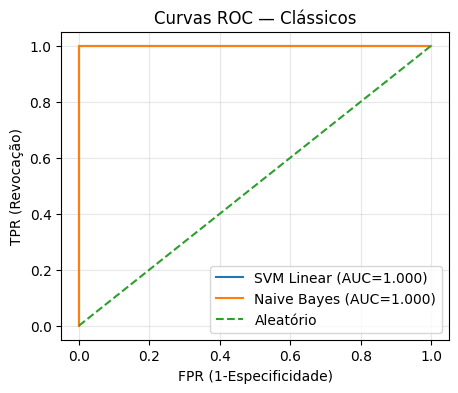

In [6]:
# Perceptron
perc = SKPerceptron(random_state=42, max_iter=1000)
perc.fit(X_train_sc, y_train)
y_pred_perc = perc.predict(X_test_sc)

# SVM Linear (com probas para ROC)
svm = SVC(kernel="linear", probability=True, random_state=42)
svm.fit(X_train_sc, y_train)
y_pred_svm = svm.predict(X_test_sc)
y_proba_svm = svm.predict_proba(X_test_sc)[:,1]

# Naive Bayes (sem padronização aqui)
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)
y_proba_nb = nb_clf.predict_proba(X_test)[:,1]

def print_report(name, y_true, y_pred):
    print(f"\n=== {name} ===")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=3))

print_report("Perceptron (sklearn)", y_test, y_pred_perc)
print_report("SVM Linear", y_test, y_pred_svm)
print_report("Naive Bayes", y_test, y_pred_nb)

# ROC/AUC
from matplotlib import pyplot as plt
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
auc_svm = auc(fpr_svm, tpr_svm)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(5,4))
plt.plot(fpr_svm, tpr_svm, label=f"SVM Linear (AUC={auc_svm:.3f})")
plt.plot(fpr_nb,  tpr_nb,  label=f"Naive Bayes (AUC={auc_nb:.3f})")
plt.plot([0,1],[0,1],'--', label="Aleatório")
plt.xlabel("FPR (1-Especificidade)"); plt.ylabel("TPR (Revocação)")
plt.title("Curvas ROC — Clássicos"); plt.legend(); plt.grid(True, alpha=.3); plt.show()

## 🗺️ Fronteiras de decisão — Perceptron e SVM

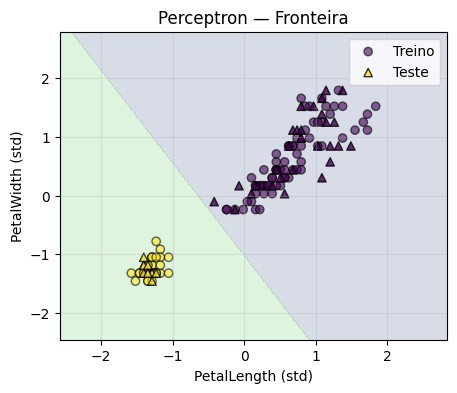

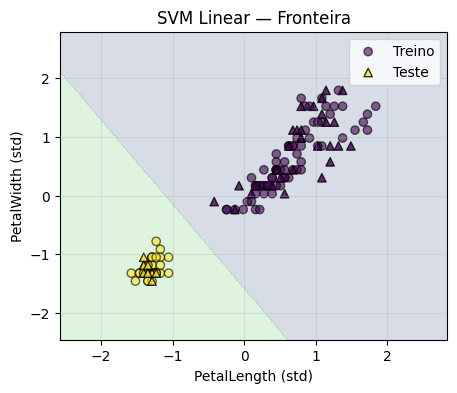

In [7]:
def plot_decision_boundary(model, X_tr_sc, y_tr, X_te_sc, y_te, title):
    x_min, x_max = X_tr_sc[:,0].min()-1, X_tr_sc[:,0].max()+1
    y_min, y_max = X_tr_sc[:,1].min()-1, X_tr_sc[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(5,4))
    plt.contourf(xx, yy, zz, alpha=0.2, levels=[-0.1,0.5,1.1])
    plt.scatter(X_tr_sc[:,0], X_tr_sc[:,1], c=y_tr, edgecolor='k', alpha=0.6, label="Treino")
    plt.scatter(X_te_sc[:,0], X_te_sc[:,1], c=y_te, marker='^', edgecolor='k', alpha=0.8, label="Teste")
    plt.title(title); plt.xlabel("PetalLength (std)"); plt.ylabel("PetalWidth (std)")
    plt.legend(); plt.grid(True, alpha=.3); plt.show()

plot_decision_boundary(perc, X_train_sc, y_train, X_test_sc, y_test, "Perceptron — Fronteira")
plot_decision_boundary(svm,  X_train_sc, y_train, X_test_sc, y_test, "SVM Linear — Fronteira")

## 🔁 Validação k-fold (clássicos) e Grid de hiperparâmetros (SVM)

In [8]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline simples para SVM com padronização
from sklearn.pipeline import Pipeline
pipe_svm = Pipeline([("scaler", StandardScaler()), ("svm", SVC(kernel="linear", probability=True, random_state=42))])
param_grid = {"svm__C":[0.1, 1, 10]}

grid = GridSearchCV(pipe_svm, param_grid, scoring="f1", cv=skf, n_jobs=-1)
grid.fit(X, y_bin)
print("Melhor C (SVM):", grid.best_params_, "| melhor F1:", grid.best_score_)

Melhor C (SVM): {'svm__C': 0.1} | melhor F1: 1.0


## 🔮 Perceptron Quântico (TFQ) — Intuição rápida
- Atributos viram **ângulos** em rotações quânticas (codificação).  
- Usamos **camadas** de portas parametrizadas (RY/RZ) + **entrelaçamento** (CZ ou CNOT).  
- A camada `tfq.layers.PQC` calcula **valores esperados**; mapeamos para [0,1] com **sigmoide**.

> A seguir, construímos funções para criar **circuitos configuráveis** e um **modelo Keras**.

In [9]:
if not TFQ_AVAILABLE:
    raise RuntimeError("TensorFlow Quantum não está disponível. Execute a célula de instalação e reinicie o runtime.")

import cirq, sympy, tensorflow_quantum as tfq

def to_angles(X2):
    # Padroniza por coluna e mapeia para [-pi, pi]. Retorna (angles, (mu, sd)).
    mu = X2.mean(axis=0, keepdims=True)
    sd = X2.std(axis=0, keepdims=True) + 1e-8
    Z = (X2 - mu) / sd
    Z = np.clip(Z, -3, 3)
    angles = (Z / 3.0) * np.pi
    return angles, (mu, sd)

def encode_circuit(phi1, phi2, qubits):
    # Codificacao angular RX+RZ em dois qubits.
    q0, q1 = qubits
    c = cirq.Circuit()
    c.append(cirq.rx(phi1)(q0)); c.append(cirq.rz(phi1)(q0))
    c.append(cirq.rx(phi2)(q1)); c.append(cirq.rz(phi2)(q1))
    return c

def build_variational_circuit(qubits, n_camadas=1, entangler="CZ"):
    # Gera circuito variacional com n camadas: [RY(q0), RY(q1), Entangler].
    # entangler deve estar em {'CZ', 'CNOT', 'CZ+RZ'}.
    q0, q1 = qubits
    thetas = []
    circ = cirq.Circuit()
    for k in range(n_camadas):
        t1 = sympy.symbols(f"theta_{k}_q0")
        t2 = sympy.symbols(f"theta_{k}_q1")
        thetas += [t1, t2]
        circ.append(cirq.ry(t1)(q0))
        circ.append(cirq.ry(t2)(q1))
        if entangler == "CZ":
            circ.append(cirq.CZ(q0, q1))
        elif entangler == "CNOT":
            circ.append(cirq.CNOT(q0, q1))
        elif entangler == "CZ+RZ":
            circ.append(cirq.CZ(q0, q1))
            rztheta = sympy.symbols(f"theta_{k}_rz")
            circ.append(cirq.rz(rztheta)(q0))
            thetas.append(rztheta)
        else:
            circ.append(cirq.CZ(q0, q1))
    readout = cirq.Z(q0)
    return circ, thetas, readout

def make_tfq_model(n_camadas=1, entangler="CZ", lr=0.02):
    q0, q1 = cirq.GridQubit.rect(1, 2)
    var_circ, thetas, readout = build_variational_circuit((q0, q1), n_camadas, entangler)
    pqc = tfq.layers.PQC(var_circ, readout)
    inp = tf.keras.Input(shape=(), dtype=tf.string)
    x = pqc(inp)
    out = tf.keras.layers.Activation("sigmoid")(x)
    model = tf.keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=["accuracy"])
    return model

def circuits_from_X(X_real, norm_stats=None):
    # Transforma X_real -> angulos -> circuitos TFQ.
    if norm_stats is None:
        angles, stats = to_angles(X_real)
    else:
        mu, sd = norm_stats
        Z = (X_real - mu) / (sd + 1e-8); Z = np.clip(Z, -3, 3)
        angles = (Z / 3.0) * np.pi; stats = norm_stats
    q0, q1 = cirq.GridQubit.rect(1, 2)
    circs = [encode_circuit(a1, a2, (q0, q1)) for a1, a2 in angles]
    return tfq.convert_to_tensor(circs), stats

def train_eval_once(X_tr, y_tr, X_va, y_va, n_camadas=1, entangler="CZ", lr=0.02, epochs=30, verbose=0):
    xtr_tfq, stats = circuits_from_X(X_tr, None)
    xva_tfq, _    = circuits_from_X(X_va, stats)
    model = make_tfq_model(n_camadas=n_camadas, entangler=entangler, lr=lr)
    model.fit(xtr_tfq, y_tr, batch_size=16, epochs=epochs, verbose=verbose, validation_data=(xva_tfq, y_va))
    y_score = model.predict(xva_tfq, verbose=0).ravel()
    y_pred  = (y_score >= 0.5).astype(int)
    acc = (y_pred == y_va).mean()
    return acc, model, stats

## 🚀 TFQ — Treino simples (holdout) e ROC

Acurácia (TFQ, holdout): 0.8222222222222222


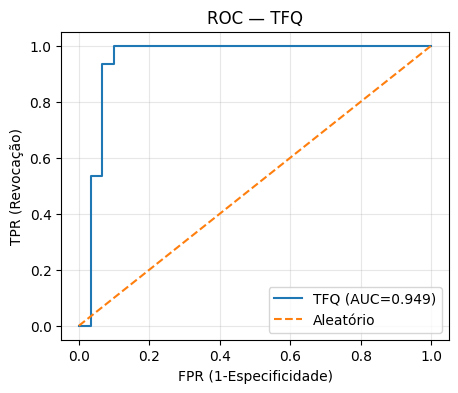

In [10]:
acc_q, q_model, norm_stats = train_eval_once(X_train, y_train, X_test, y_test,
                                             n_camadas=2, entangler="CZ", lr=0.02, epochs=40, verbose=0)
print("Acurácia (TFQ, holdout):", acc_q)

# ROC/AUC TFQ
xte_tfq, _ = circuits_from_X(X_test, norm_stats)
y_score_q = q_model.predict(xte_tfq, verbose=0).ravel()
from sklearn.metrics import roc_curve, auc
fpr_q, tpr_q, _ = roc_curve(y_test, y_score_q)
auc_q = auc(fpr_q, tpr_q)

plt.figure(figsize=(5,4))
plt.plot(fpr_q, tpr_q, label=f"TFQ (AUC={auc_q:.3f})")
plt.plot([0,1],[0,1],'--', label="Aleatório")
plt.xlabel("FPR (1-Especificidade)"); plt.ylabel("TPR (Revocação)")
plt.title("ROC — TFQ"); plt.legend(); plt.grid(True, alpha=.3); plt.show()

## 🗺️ TFQ — Fronteira de decisão (2D)

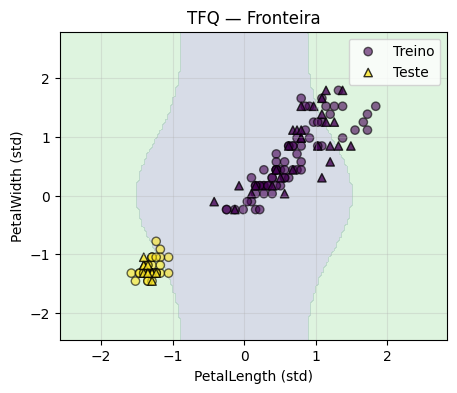

In [11]:
# Grade no espaço padronizado (para comparação com clássicos)
mu, sd = X_train.mean(axis=0, keepdims=True), X_train.std(axis=0, keepdims=True) + 1e-8

def inv_standardize(Xsc, mu, sd):
    return Xsc * sd + mu

x_min, x_max = (X_train_sc[:,0].min()-1), (X_train_sc[:,0].max()+1)
y_min, y_max = (X_train_sc[:,1].min()-1), (X_train_sc[:,1].max()+1)
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 150),
                     np.linspace(y_min, y_max, 150))
grid_sc = np.c_[xx.ravel(), yy.ravel()]
grid_real = inv_standardize(grid_sc, mu, sd)

grid_tfq, _ = circuits_from_X(grid_real, norm_stats)
grid_scores = q_model.predict(grid_tfq, verbose=0).ravel()
zz = (grid_scores >= 0.5).astype(int).reshape(xx.shape)

plt.figure(figsize=(5,4))
plt.contourf(xx, yy, zz, alpha=0.2, levels=[-0.1,0.5,1.1])
plt.scatter(X_train_sc[:,0], X_train_sc[:,1], c=y_train, edgecolor='k', alpha=0.6, label="Treino")
plt.scatter(X_test_sc[:,0],  X_test_sc[:,1],  c=y_test,  marker='^', edgecolor='k', alpha=0.8, label="Teste")
plt.title("TFQ — Fronteira"); plt.xlabel("PetalLength (std)"); plt.ylabel("PetalWidth (std)")
plt.legend(); plt.grid(True, alpha=.3); plt.show()

## 🔁 TFQ — Validação k-fold e busca de hiperparâmetros (leve)
> Para evitar **vazamento**, as estatísticas de normalização dos ângulos são **recalculadas em cada dobra** somente com o treino da dobra.

In [12]:
def kfold_tfq(X, y, n_splits=3, n_camadas_list=(1,2), entanglers=("CZ","CNOT"), lrs=(0.02,), epochs=25, verbose=0):
    results = []
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    for n_camadas in n_camadas_list:
        for ent in entanglers:
            for lr in lrs:
                accs = []
                for tr_idx, va_idx in skf.split(X, y):
                    Xtr, Xva = X[tr_idx], X[va_idx]
                    ytr, yva = y[tr_idx], y[va_idx]
                    acc, _, _ = train_eval_once(Xtr, ytr, Xva, yva,
                                                n_camadas=n_camadas, entangler=ent, lr=lr,
                                                epochs=epochs, verbose=verbose)
                    accs.append(acc)
                results.append({
                    "n_camadas": n_camadas, "entangler": ent, "lr": lr,
                    "acc_media": float(np.mean(accs)), "acc_std": float(np.std(accs))
                })
    import pandas as pd
    return pd.DataFrame(results).sort_values(["acc_media"], ascending=False).reset_index(drop=True)

df_tfq_grid = kfold_tfq(X, y_bin, n_splits=3,
                        n_camadas_list=(1,2,3),
                        entanglers=("CZ","CNOT"),
                        lrs=(0.01, 0.02),
                        epochs=20, verbose=0)
df_tfq_grid.head()

/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values e

,n_camadas,entangler,lr,acc_media,acc_std
0,2,CZ,0.01,0.866667,0.057349
1,2,CNOT,0.01,0.866667,0.057349
2,3,CNOT,0.02,0.866667,0.073636
3,2,CZ,0.02,0.840000,0.065320
4,2,CNOT,0.02,0.840000,0.048990


## 🟡 Casos limítrofes — onde o modelo fica em dúvida

In [13]:
thr = 0.60
low_idx = np.where((y_score_q >= 0.5 - (thr-0.5)) & (y_score_q <= 0.5 + (thr-0.5)))[0]
import pandas as pd
df_lim = pd.DataFrame({
    "idx_teste": low_idx,
    "PetalLength": X_test[low_idx,0],
    "PetalWidth":  X_test[low_idx,1],
    "y_real": y_test[low_idx],
    "score_TFQ": y_score_q[low_idx]
})
df_lim.reset_index(drop=True).head(10)

,idx_teste,PetalLength,PetalWidth,y_real,score_TFQ
0,0,1.5,0.2,1,0.554689
1,1,5.1,2.3,0,0.436190
2,2,1.4,0.2,1,0.568987
3,4,1.5,0.2,1,0.554689
4,5,1.3,0.3,1,0.568065
5,9,1.3,0.3,1,0.568065
6,12,1.4,0.2,1,0.568987
7,13,1.3,0.4,1,0.552821
8,15,1.5,0.2,1,0.554689
9,16,5.6,2.4,0,0.530527


## 👣 Passo a Passo (lúdico) para estudantes
1. **Olhe os números**: comprimento e largura da pétala são como pistas 🔍.  
2. **Some com pesos**: o neurônio faz uma **conta** e compara com um **limite**.  
3. **Se passou do limite** → **Setosa (1)** ✅; senão → **Não-Setosa (0)** ❌.  
4. **Se erra**, ele **se corrige** (ajusta os pesos) 🔧.  
5. No mundo **quântico**, as pistas viram **ângulos** em qubits 🌀; as portas giram e **entrelaçam** os qubits para aprender.

## ✅ Conclusões
- **Perceptron** aprende uma **linha** de separação; ótimo para padrões quase lineares.  
- **SVM Linear** é um baseline forte; **Naive Bayes** dá uma referência simples.  
- **TFQ** permite testar circuitos (camadas/portas) e comparar com clássicos por **AUC** e **F1**.  
- **k-fold** e **grid** ajudam a escolher **hiperparâmetros** com menos viés.  

> Próximos passos: usar **mais features** (4D → reduzir com PCA), mais camadas quânticas, e grids um pouco maiores.

In [14]:
# ===== Patch 1: Normalização de ângulos + encode_circuit =====
import numpy as np
import cirq, sympy, tensorflow_quantum as tfq
import tensorflow as tf

# Qubits globais (2 qubits em linha)
QUBITS = cirq.GridQubit.rect(1, 2)  # [q(0,0), q(0,1)]
q0, q1 = QUBITS

# Fit/transform para ângulos: garante que treino e inferência usem as MESMAS estatísticas
class AngleScaler:
    def __init__(self, clip=3.0, to_span=np.pi):
        self.mu_ = None
        self.sd_ = None
        self.clip = clip
        self.to_span = to_span

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mu_ = X.mean(axis=0, keepdims=True)
        self.sd_ = X.std(axis=0, keepdims=True) + 1e-8
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        Z = (X - self.mu_) / self.sd_
        Z = np.clip(Z, -self.clip, self.clip)
        ang = (Z / self.clip) * self.to_span   # mapeia [-clip,clip] -> [-pi, pi]
        return ang

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# Cria circuits de codificação a partir de dois ângulos
def encode_circuit(phi1, phi2, qubits=None):
    """Gera um circuito de codificação com duas rotações por qubit (RX e RZ).
       Aceita: encode_circuit(phi1, phi2)  ou  encode_circuit(phi1, phi2, qubits=[...]).
    """
    if qubits is None:
        qubits = QUBITS
    q0, q1 = qubits
    c = cirq.Circuit()
    # Codificação angular (simples e estável)
    c.append(cirq.rx(float(phi1))(q0))
    c.append(cirq.rz(float(phi1))(q0))
    c.append(cirq.rx(float(phi2))(q1))
    c.append(cirq.rz(float(phi2))(q1))
    return c

# Instancia e ajusta o "AngleScaler" nos dados REAIS (não padronizados do sklearn)
# Aqui assumimos que você tem X_train, X_test (2 colunas: PetalLength, PetalWidth)
angle_scaler = AngleScaler(clip=3.0, to_span=np.pi)
angles_tr = angle_scaler.fit_transform(X_train)   # usa média e desvio DO TREINO
angles_te = angle_scaler.transform(X_test)

# Converte dados em tensores de circuitos TFQ
def circuits_from_angles(angles):
    return [encode_circuit(a1, a2) for (a1, a2) in angles]

x_circuits_tr = circuits_from_angles(angles_tr)
x_circuits_te = circuits_from_angles(angles_te)

x_tfq_tr = tfq.convert_to_tensor(x_circuits_tr)
x_tfq_te = tfq.convert_to_tensor(x_circuits_te)


In [15]:
# Entrada direta por texto (útil para colar valores)
import re
from IPython.display import display
try:
    import ipywidgets as widgets
except:
    pass

txt = widgets.Text(
    value="1.4, 0.2",
    description="x1,x2:",
    placeholder="Ex.: 1.4, 0.2",
    style={'description_width':'80px'},
    layout=widgets.Layout(width='260px')
)
btn_go = widgets.Button(description="Prever (texto)", button_style='')
out2 = widgets.Output()

def parse_pair(s):
    nums = re.findall(r"[-+]?\d*\.?\d+(?:[eE][-+]?\d+)?", s.replace(',', ' '))
    if len(nums) >= 2:
        return float(nums[0]), float(nums[1])
    return None

def on_go(_):
    with out2:
        clear_output()
        pair = parse_pair(txt.value)
        if not pair:
            print("⚠️ Digite dois números (x1, x2). Ex.: 1.4, 0.2")
            return
        x1, x2 = pair
        errs = validate_inputs(x1, x2)
        if errs:
            print("⚠️ Entradas inválidas:")
            for e in errs: print(" -", e)
            return
        print(f"Rodando para x1={x1:.2f}, x2={x2:.2f} …")
        results = predict_all(x1, x2, plot_on_ax=None)
        # resumo rápido
        def label01(v): return "Setosa (1)" if int(v)==1 else "Não-Setosa (0)"
        rP = results['Perceptron']
        print(f"Perceptron: z={rP['z']:.3f} | ŷ={label01(rP['y_hat'])}")
        rS = results['SVM Linear']; print(f"SVM: ŷ={label01(rS['y_hat'])} | P(1)≈{rS['p_1']:.3f}")
        rN = results['Naive Bayes']; print(f"NB : ŷ={label01(rN['y_hat'])} | P(1)≈{rN['p_1']:.3f}")
        rQ = results['TFQ (Quântico)']
        if 'p_1_sigmoid' in rQ:
            print(f"TFQ: ŷ={label01(rQ['y_hat'])} | sigmoid≈{rQ['p_1_sigmoid']:.3f}")
        else:
            print(f"TFQ: {rQ['info']}")

btn_go.on_click(on_go)
display(widgets.HBox([txt, btn_go]))
display(out2)


Output()

In [16]:
# ===== Patch 2: Circuito variacional parametrizável =====
def build_variational_circuit(depth=1, single_qubit='ry', entangle='cz'):
    """Cria um circuito variacional com 'depth' camadas.
       single_qubit: 'ry' | 'rz' | 'ryrz' (aplica RY e depois RZ)
       entangle:     'cz' | 'cx' | 'zz' | None
    """
    thetas = []
    c = cirq.Circuit()
    for d in range(depth):
        # parâmetros simbólicos por camada
        t00 = sympy.Symbol(f"theta_{d}_q0_a")
        t01 = sympy.Symbol(f"theta_{d}_q0_b")
        t10 = sympy.Symbol(f"theta_{d}_q1_a")
        t11 = sympy.Symbol(f"theta_{d}_q1_b")
        thetas.extend([t00, t01, t10, t11])

        # Portas de 1 qubit
        if single_qubit == 'ry':
            c.append(cirq.ry(t00)(q0))
            c.append(cirq.ry(t10)(q1))
        elif single_qubit == 'rz':
            c.append(cirq.rz(t00)(q0))
            c.append(cirq.rz(t10)(q1))
        elif single_qubit == 'ryrz':
            c.append(cirq.ry(t00)(q0))
            c.append(cirq.rz(t01)(q0))
            c.append(cirq.ry(t10)(q1))
            c.append(cirq.rz(t11)(q1))
        else:
            raise ValueError("single_qubit deve ser 'ry', 'rz' ou 'ryrz'.")

        # Emaranhamento
        if entangle == 'cz':
            c.append(cirq.CZ(q0, q1))
        elif entangle == 'cx':
            c.append(cirq.CX(q0, q1))
        elif entangle == 'zz':
            c.append(cirq.ZZPowGate(exponent=1.0)(q0, q1))
        elif entangle is None:
            pass
        else:
            raise ValueError("entangle deve ser 'cz', 'cx', 'zz' ou None.")
    return c


In [17]:
# ============================================================
# Patch TFQ — qubits únicos + encode + variational + modelo
# ============================================================
import numpy as np
import tensorflow as tf
import cirq, sympy, tensorflow_quantum as tfq

# ---------- Qubits únicos (compartilhados por TUDO) ----------
QUBITS = cirq.GridQubit.rect(1, 2)  # 2 qubits em linha
# (não crie q0,q1 "soltos"; sempre derive de QUBITS)
# Se precisar explicitamente:
# q0, q1 = QUBITS

# ---------- Normalização -> Ângulos ----------
class AngleScaler:
    """Mapeia X(real) -> ângulos em [-pi, pi] com stats do treino."""
    def __init__(self, clip=3.0, to_span=np.pi):
        self.mu_ = None
        self.sd_ = None
        self.clip = clip
        self.to_span = to_span

    def fit(self, X):
        X = np.asarray(X, dtype=float)
        self.mu_ = X.mean(axis=0, keepdims=True)
        self.sd_ = X.std(axis=0, keepdims=True) + 1e-8
        return self

    def transform(self, X):
        X = np.asarray(X, dtype=float)
        Z = (X - self.mu_) / self.sd_
        Z = np.clip(Z, -self.clip, self.clip)
        return (Z / self.clip) * self.to_span

    def fit_transform(self, X):
        return self.fit(X).transform(X)

# Instancie usando os dados reais (2 colunas: PetalLength, PetalWidth)
angle_scaler = AngleScaler(clip=3.0, to_span=np.pi)
angles_tr = angle_scaler.fit_transform(X_train)
angles_te = angle_scaler.transform(X_test)

# ---------- Codificação (usa SEMPRE QUBITS) ----------
def encode_circuit(phi1, phi2, qubits=None):
    """Circuito de dados: RX e RZ em cada qubit, a partir de dois ângulos."""
    if qubits is None:
        qubits = QUBITS
    q0, q1 = qubits
    c = cirq.Circuit()
    c.append(cirq.rx(float(phi1))(q0))
    c.append(cirq.rz(float(phi1))(q0))
    c.append(cirq.rx(float(phi2))(q1))
    c.append(cirq.rz(float(phi2))(q1))
    return c

def circuits_from_angles(angles, qubits=None):
    if qubits is None:
        qubits = QUBITS
    return [encode_circuit(a1, a2, qubits=qubits) for (a1, a2) in angles]

x_circuits_tr = circuits_from_angles(angles_tr)
x_circuits_te = circuits_from_angles(angles_te)
x_tfq_tr = tfq.convert_to_tensor(x_circuits_tr)
x_tfq_te = tfq.convert_to_tensor(x_circuits_te)

# ---------- Circuito variacional (usa SEMPRE QUBITS) ----------
def build_variational_circuit(depth=1, single_qubit='ryrz', entangle='cz', qubits=None):
    """depth camadas; single_qubit: 'ry'|'rz'|'ryrz'; entangle: 'cz'|'cx'|'zz'|None."""
    if qubits is None:
        qubits = QUBITS
    q0, q1 = qubits
    c = cirq.Circuit()
    for d in range(depth):
        # parâmetros simbólicos (até 2 por qubit, para 'ryrz')
        t00 = sympy.Symbol(f"theta_{d}_q0_a")
        t01 = sympy.Symbol(f"theta_{d}_q0_b")
        t10 = sympy.Symbol(f"theta_{d}_q1_a")
        t11 = sympy.Symbol(f"theta_{d}_q1_b")

        if single_qubit == 'ry':
            c.append(cirq.ry(t00)(q0))
            c.append(cirq.ry(t10)(q1))
        elif single_qubit == 'rz':
            c.append(cirq.rz(t00)(q0))
            c.append(cirq.rz(t10)(q1))
        elif single_qubit == 'ryrz':
            c.append(cirq.ry(t00)(q0))
            c.append(cirq.rz(t01)(q0))
            c.append(cirq.ry(t10)(q1))
            c.append(cirq.rz(t11)(q1))
        else:
            raise ValueError("single_qubit deve ser 'ry', 'rz' ou 'ryrz'.")

        if entangle == 'cz':
            c.append(cirq.CZ(q0, q1))
        elif entangle == 'cx':
            c.append(cirq.CX(q0, q1))
        elif entangle == 'zz':
            c.append(cirq.ZZPowGate(exponent=1.0)(q0, q1))
        elif entangle is None:
            pass
        else:
            raise ValueError("entangle deve ser 'cz', 'cx', 'zz' ou None.")
    return c

# ---------- Modelo TFQ (PQC) ----------
def build_q_model(depth=1, single_qubit='ryrz', entangle='cz', lr=0.02, qubits=None):
    if qubits is None:
        qubits = QUBITS
    # circuito variacional e readout nos MESMOS qubits da codificação
    variational = build_variational_circuit(depth=depth, single_qubit=single_qubit,
                                            entangle=entangle, qubits=qubits)
    readout = cirq.Z(qubits[0])  # mede Z no primeiro qubit
    pqc = tfq.layers.PQC(variational, readout)

    inp = tf.keras.Input(shape=(), dtype=tf.string)
    x = pqc(inp)                             # valor esperado ∈ [-1, 1]
    out = tf.keras.layers.Activation('sigmoid')(x)  # mapeia para [0, 1]
    model = tf.keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy'])
    return model

# ---------- Treino com EarlyStopping ----------
q_model = build_q_model(depth=1, single_qubit='ryrz', entangle='cz', lr=0.02, qubits=QUBITS)
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6,
                                         restore_best_weights=True, verbose=0)
hist = q_model.fit(x_tfq_tr, y_train,
                   validation_split=0.2,
                   batch_size=16, epochs=60, verbose=0,
                   callbacks=[early])
print("✅ TFQ treinado. Melhor val_loss:", np.min(hist.history['val_loss']))

# ---------- Checagens de sanidade ----------
# 1) Os qubits usados na codificação e no variacional são os MESMOS?
assert set(next(iter(x_circuits_tr)).all_qubits()) == set(QUBITS), "Codificação usa qubits diferentes!"
# 2) Predição no teste (para ver se roda sem erros)
y_score_q = q_model.predict(x_tfq_te, verbose=0).ravel()
y_pred_q  = (y_score_q >= 0.5).astype(int)
print("Acurácia TFQ (teste):", (y_pred_q == y_test).mean())


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


✅ TFQ treinado. Melhor val_loss: 0.5221279263496399
Acurácia TFQ (teste): 0.6666666666666666


In [18]:
def predict_point_quantum(x1, x2, model=None):
    if model is None:
        model = q_model
    ang = angle_scaler.transform(np.array([[x1, x2]], dtype=float))   # usa stats do treino
    circ = tfq.convert_to_tensor([encode_circuit(ang[0,0], ang[0,1])]) # mesmos QUBITS
    y_score = float(model.predict(circ, verbose=0).ravel()[0])
    y_pred  = int(y_score >= 0.5)
    return y_pred, y_score


In [19]:
# ===========================
# Painel Interativo em Colab
# ===========================
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import FloatText, Button, HBox, VBox, Output, HTML

# --- verificação mínima ---
for v in ["perc","svm","nb_clf","scaler","q_model","angle_scaler","encode_circuit"]:
    if v not in globals():
        raise RuntimeError(f"Variável '{v}' não está definida. Treine/execute as células anteriores.")

# --- util: reta do Perceptron em coordenadas reais (cm) ---
def perceptron_line_real_from_scaled(perc, scaler, x1_min, x1_max, num=100):
    """Converte w,b aprendidos em espaço padronizado para uma reta em cm."""
    w = perc.coef_.ravel()        # w_sc (2,)
    b = perc.intercept_[0]        # b_sc
    mu = scaler.mean_             # (2,)
    sd = scaler.scale_            # (2,)

    # z = w·((x - mu)/sd) + b  == 0
    # => (w1/sd1)x1 + (w2/sd2)x2 + (b - w1*mu1/sd1 - w2*mu2/sd2) = 0
    a1 = w[0]/sd[0]
    a2 = w[1]/sd[1]
    c0 = b - w[0]*mu[0]/sd[0] - w[1]*mu[1]/sd[1]

    if abs(a2) < 1e-12:
        # reta “quase vertical”: desenha x ~ constante onde a1*x1 + c0 = 0
        x_line = np.linspace(x1_min, x1_max, num)
        x_const = -c0/a1 if abs(a1) > 1e-12 else (x1_min+x1_max)/2
        y_line = np.full_like(x_line, x_const)
        return x_line, y_line, True  # (x,y) mas é vertical
    else:
        # x2 = -(a1/a2) x1 - c0/a2
        x_line = np.linspace(x1_min, x1_max, num)
        y_line = -(a1/a2)*x_line - c0/a2
        return x_line, y_line, False

# --- predição integrada ---
def predict_all(x1, x2):
    # Clássicos
    x_real = np.array([[x1, x2]], dtype=float)
    x_sc = scaler.transform(x_real)
    y_perc = int(perc.predict(x_sc)[0])

    y_svm  = int(svm.predict(x_sc)[0])
    p_svm  = float(svm.predict_proba(x_sc)[0,1])

    y_nb   = int(nb_clf.predict(x_real)[0])
    p_nb   = float(nb_clf.predict_proba(x_real)[0,1])

    # Quântico
    y_q, s_q = predict_point_quantum(x1, x2, model=q_model)  # usa angle_scaler interno

    return {
        "perc": (y_perc, None),
        "svm":  (y_svm,  p_svm),
        "nb":   (y_nb,   p_nb),
        "q":    (y_q,    s_q)
    }

# --- UI ---
pl_in = FloatText(value=1.40, description='PetalLength (cm):', step=0.01)
pw_in = FloatText(value=0.20, description='PetalWidth (cm):',  step=0.01)
run_bt = Button(description='Prever', button_style='primary')
out   = Output()

def on_click_run(_):
    with out:
        out.clear_output()

        x1 = float(pl_in.value)
        x2 = float(pw_in.value)
        res = predict_all(x1, x2)

        # Texto
        print(f"🧪 Entrada: (PL={x1:.2f} cm, PW={x2:.2f} cm)")
        print(f"Perceptron → y={res['perc'][0]}")
        print(f"SVM Linear → y={res['svm'][0]},  p(1)={res['svm'][1]:.3f}")
        print(f"Naive Bayes → y={res['nb'][0]},   p(1)={res['nb'][1]:.3f}")
        print(f"TFQ (quântico) → y={res['q'][0]},  score≈{res['q'][1]:.3f}")

        # Plot  (dados reais + reta do Perceptron + seu ponto ★)
        X_all = np.vstack([X_train, X_test])
        y_all = np.concatenate([y_train, y_test])

        x1_min, x1_max = X_all[:,0].min()-0.5, X_all[:,0].max()+0.5
        x2_min, x2_max = X_all[:,1].min()-0.5, X_all[:,1].max()+0.5

        fig, ax = plt.subplots(figsize=(5.2,4.2))
        ax.scatter(X_all[:,0], X_all[:,1], c=y_all, edgecolor='k', alpha=0.6)
        # Reta do Perceptron (em cm)
        xs, ys, is_vertical = perceptron_line_real_from_scaled(perc, scaler, x1_min, x1_max)
        if is_vertical:
            ax.axvline(ys[0], linestyle='--')
        else:
            ax.plot(xs, ys, '--', label='Perceptron: z=0')

        ax.scatter([x1],[x2], marker='*', s=180, edgecolor='k', label='Seu ponto (★)')
        ax.set_xlim(x1_min, x1_max); ax.set_ylim(x2_min, x2_max)
        ax.set_xlabel('PetalLength (cm)')
        ax.set_ylabel('PetalWidth (cm)')
        ax.set_title('Seu ponto (★) e a reta z=0 do Perceptron')
        ax.legend(loc='best'); ax.grid(True, alpha=.3)
        plt.show()

run_bt.on_click(on_click_run)
display(VBox([HBox([pl_in, pw_in, run_bt]), out]))


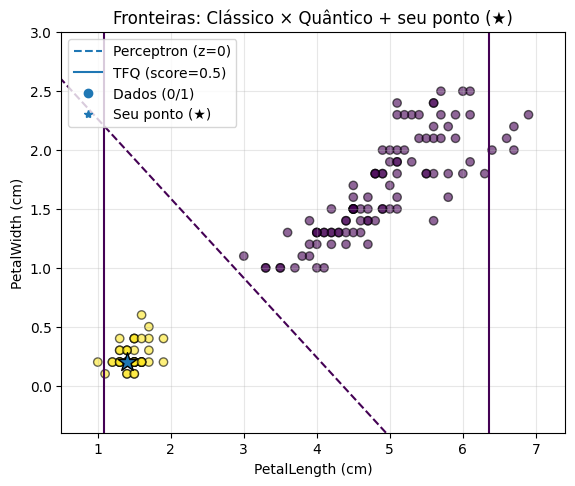

In [20]:
# === Sobreposição das fronteiras: Perceptron (clássico) × TFQ + seu ponto (★) ===
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_quantum as tfq
from matplotlib.lines import Line2D

# 1) grade em coordenadas REAIS (cm) para plottar no mesmo espaço dos dados
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

x1_min, x1_max = X_all[:,0].min()-0.5, X_all[:,0].max()+0.5
x2_min, x2_max = X_all[:,1].min()-0.5, X_all[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 240),
                     np.linspace(x2_min, x2_max, 240))
grid_real = np.c_[xx.ravel(), yy.ravel()]

# 2) Perceptron clássico: decisão na grade (usa dados padronizados p/ o clássico)
grid_sc = scaler.transform(grid_real)
# Alguns Perceptron(s) não expõem decision_function; se for o caso, use predict:
if hasattr(perc, "decision_function"):
    z_classic = perc.decision_function(grid_sc).reshape(xx.shape)
else:
    z_pred = perc.predict(grid_sc).reshape(xx.shape)
    # Constrói um "nível 0" artificial (apenas para contorno visual):
    z_classic = z_pred - 0.5

# 3) TFQ: gera ângulos e circuits na MESMA normalização do treino
try:
    grid_angles = angle_scaler.transform(grid_real)  # se você criou um transformer próprio
except NameError:
    # fallback: reconstrói a transformação de ângulos a partir do que foi usado no treino
    mu, sd = norm_stats  # (mu, sd) retornados pela função to_angles no treino
    Z = (grid_real - mu) / (sd + 1e-8)
    Z = np.clip(Z, -3, 3)
    grid_angles = (Z / 3.0) * np.pi

grid_circs  = [encode_circuit(a[0], a[1]) for a in grid_angles]
x_tfq_grid  = tfq.convert_to_tensor(grid_circs)
scores_q    = q_model.predict(x_tfq_grid, verbose=0).ravel().reshape(xx.shape)

# 4) seu ponto (use ponto decimal .)
x1, x2 = 1.40, 0.20

plt.figure(figsize=(6.5, 5.2))

# Dados (treino+teste)
pts = plt.scatter(X_all[:,0], X_all[:,1], c=y_all, edgecolor='k', alpha=0.6)

# Contorno do Perceptron: nível z=0
C1 = plt.contour(xx, yy, z_classic, levels=[0], linestyles='--')

# Contorno do TFQ: nível score=0.5
C2 = plt.contour(xx, yy, scores_q, levels=[0.5], linestyles='-')

# Seu ponto (★)
star = plt.scatter([x1], [x2], marker='*', s=200, edgecolor='k')

plt.xlabel('PetalLength (cm)')
plt.ylabel('PetalWidth (cm)')
plt.title('Fronteiras: Clássico × Quântico + seu ponto (★)')
plt.grid(True, alpha=.3)

# === LEGENDA ROBUSTA (sem usar CS.collections) ===
handles = [
    Line2D([0],[0], linestyle='--'),
    Line2D([0],[0], linestyle='-'),
    Line2D([0],[0], marker='o', linestyle=''),
    Line2D([0],[0], marker='*', linestyle='')
]
labels = ['Perceptron (z=0)',
          'TFQ (score=0.5)',
          'Dados (0/1)',
          'Seu ponto (★)']
plt.legend(handles, labels, loc='best')
plt.show()


In [21]:
# Imports base
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, f1_score, accuracy_score)
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

import tensorflow as tf
import importlib.metadata as md
import cirq, sympy
import tensorflow_quantum as tfq

np.random.seed(42); tf.random.set_seed(42)

print("TF:", tf.__version__)
print("TFQ:", tfq.__version__)
print("cirq-core:", md.version("cirq-core"))


TF: 2.15.0
TFQ: 0.7.2
cirq-core: 1.3.0


In [22]:
# 1) Carregar Iris e reduzir a 2 features: PetalLength, PetalWidth
iris = datasets.load_iris()
X_all = iris['data'][:, [2, 3]]   # [PetalLength, PetalWidth]
y_all = (iris['target'] == 0).astype(int)  # 1=Setosa, 0=Não-Setosa

# 2) Split treino+val vs teste (estratificado)
X_tmp, X_test, y_tmp, y_test = train_test_split(
    X_all, y_all, test_size=0.30, random_state=42, stratify=y_all
)
# 3) Split treino vs validação
X_train, X_val, y_train, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.25, random_state=42, stratify=y_tmp
)  # 0.7 * 0.25 = 0.175 → 17.5% val, 52.5% train, 30% test

# 4) Scaler clássico (para Perceptron/SVM). NB usa X “cru” neste exemplo.
classic_scaler = StandardScaler().fit(X_train)
Xtr_sc = classic_scaler.transform(X_train)
Xval_sc = classic_scaler.transform(X_val)
Xte_sc = classic_scaler.transform(X_test)

# 5) Scaler de ângulo (para TFQ): z-score e mapeia para [-pi, pi]
class AngleScaler:
    def __init__(self, X_fit):
        self.mu = X_fit.mean(axis=0, keepdims=True)
        self.sd = X_fit.std(axis=0, keepdims=True) + 1e-8
    def transform(self, X):
        Z = (X - self.mu) / self.sd
        Z = np.clip(Z, -3, 3)
        return (Z/3.0) * np.pi

angle_scaler = AngleScaler(X_train)

# 6) Qubits e funções de codificação/variacional
q0, q1 = cirq.GridQubit.rect(1, 2)

def encode_circuit(phi1, phi2, qubits=(q0, q1)):
    q0_, q1_ = qubits
    c = cirq.Circuit()
    # Codificação angular: RX + RZ em cada qubit
    c.append(cirq.rx(phi1)(q0_)); c.append(cirq.rz(phi1)(q0_))
    c.append(cirq.rx(phi2)(q1_)); c.append(cirq.rz(phi2)(q1_))
    return c

def build_variational_circuit(depth=1, single_qubit='ryrz', entangle='cz', qubits=(q0, q1)):
    q0_, q1_ = qubits
    c = cirq.Circuit()
    for d in range(depth):
        # camada single-qubit parametrizada
        t = sympy.symbols(f'theta_{d}_0:{4}')
        if single_qubit == 'ryrz':
            c.append(cirq.ry(t[0])(q0_)); c.append(cirq.rz(t[1])(q0_))
            c.append(cirq.ry(t[2])(q1_)); c.append(cirq.rz(t[3])(q1_))
        elif single_qubit == 'rxryrz':
            t = sympy.symbols(f'theta_{d}_0:{6}')
            c.append(cirq.rx(t[0])(q0_)); c.append(cirq.ry(t[1])(q0_)); c.append(cirq.rz(t[2])(q0_))
            c.append(cirq.rx(t[3])(q1_)); c.append(cirq.ry(t[4])(q1_)); c.append(cirq.rz(t[5])(q1_))
        else:
            raise ValueError("single_qubit deve ser 'ryrz' ou 'rxryrz'.")

        # emaranhamento
        if entangle == 'cz':
            c.append(cirq.CZ(q0_, q1_))
        elif entangle == 'cx':
            c.append(cirq.CNOT(q0_, q1_))
        else:
            raise ValueError("entangle deve ser 'cz' ou 'cx'.")
    return c

def build_q_model(depth=1, single_qubit='ryrz', entangle='cz', lr=0.02):
    variational = build_variational_circuit(depth, single_qubit, entangle)
    readout = cirq.Z(q0)  # medição no q0
    pqc = tfq.layers.PQC(variational, readout)
    inp = tf.keras.Input(shape=(), dtype=tf.string)
    x   = pqc(inp)
    out = tf.keras.layers.Activation('sigmoid')(x)   # mapeia [-1,1] → [0,1]
    model = tf.keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def circuits_from_X(X, scaler):
    ang = scaler.transform(np.asarray(X, float))
    circs = [encode_circuit(a[0], a[1]) for a in ang]
    return tfq.convert_to_tensor(circs)


In [23]:
from sklearn.metrics import precision_recall_fscore_support

def best_threshold_youdenJ(model, X_val, y_val, scaler):
    x_val_tfq = circuits_from_X(X_val, scaler)
    scores = model.predict(x_val_tfq, verbose=0).ravel()
    if len(np.unique(y_val)) < 2 or np.allclose(scores, scores[0]):
        return 0.5, scores  # fallback
    fpr, tpr, thr = roc_curve(y_val, scores)
    j = tpr - fpr
    j_idx = int(np.argmax(j))
    return float(thr[j_idx]), scores

def eval_binary(y_true, y_score, thr=0.5, name=""):
    y_pred = (y_score >= thr).astype(int)
    acc = accuracy_score(y_true, y_pred)
    f1  = f1_score(y_true, y_pred, zero_division=0)
    fpr, tpr, _ = roc_curve(y_true, y_score)
    au = auc(fpr, tpr)
    print(f"{name} → ACC={acc:.3f}  F1={f1:.3f}  AUC={au:.3f}  (thr={thr:.3f})")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred, digits=3))
    return {"acc":acc, "f1":f1, "auc":au, "thr":thr}


In [24]:
grid = {
    "depth": [1, 2],
    "single": ['ryrz', 'rxryrz'],
    "ent": ['cz', 'cx'],
    "lr": [0.02, 0.01]
}

Xtr_tfq  = circuits_from_X(X_train, angle_scaler)
Xval_tfq = circuits_from_X(X_val,   angle_scaler)

results = []
best = None
best_val_auc = -np.inf

for d in grid["depth"]:
    for s in grid["single"]:
        for e in grid["ent"]:
            for lr in grid["lr"]:
                tf.keras.backend.clear_session()
                model = build_q_model(depth=d, single_qubit=s, entangle=e, lr=lr)
                early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=8,
                                                         restore_best_weights=True, verbose=0)
                hist = model.fit(
                    Xtr_tfq, y_train,
                    validation_data=(Xval_tfq, y_val),
                    batch_size=16, epochs=120, verbose=0, callbacks=[early]
                )
                thr, val_score = best_threshold_youdenJ(model, X_val, y_val, angle_scaler)
                # AUC validação
                fpr, tpr, _ = roc_curve(y_val, val_score)
                val_auc = auc(fpr, tpr)
                results.append({"depth":d, "single":s, "ent":e, "lr":lr,
                                "val_auc":val_auc, "thr":thr})
                if val_auc > best_val_auc:
                    best_val_auc = val_auc
                    best = {"depth":d, "single":s, "ent":e, "lr":lr, "thr":thr, "model":model}

pd.DataFrame(results).sort_values("val_auc", ascending=False).head(10)


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values e

,depth,single,ent,lr,val_auc,thr
5,1,rxryrz,cz,0.01,0.888889,0.532853
7,1,rxryrz,cx,0.01,0.888889,0.532853
4,1,rxryrz,cz,0.02,0.888889,0.533896
6,1,rxryrz,cx,0.02,0.888889,0.533896
10,2,ryrz,cx,0.02,0.888889,0.525133
11,2,ryrz,cx,0.01,0.888889,0.527578
12,2,rxryrz,cz,0.02,0.888889,0.583924
13,2,rxryrz,cz,0.01,0.888889,0.592226
14,2,rxryrz,cx,0.02,0.888889,0.583904
15,2,rxryrz,cx,0.01,0.888889,0.581806


In [25]:
# Refit no conjunto treino+val
Xtrval = np.vstack([X_train, X_val])
ytrval = np.hstack([y_train, y_val])

Xtrval_tfq = circuits_from_X(Xtrval, angle_scaler)
q_model_best = build_q_model(depth=best["depth"], single_qubit=best["single"],
                             entangle=best["ent"], lr=best["lr"])
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                         restore_best_weights=True, verbose=0)
hist = q_model_best.fit(
    Xtrval_tfq, ytrval,
    validation_split=0.15, epochs=140, batch_size=16, verbose=0, callbacks=[early]
)

# Limiar ótimo usando validação interna do fit acima (ou poderíamos usar X_val original)
best_threshold, _ = best_threshold_youdenJ(q_model_best, X_val, y_val, angle_scaler)
print(f"✅ Limiar ótimo (Youden J) após refit: {best_threshold:.3f}")

# Avaliação no teste
Xte_tfq = circuits_from_X(X_test, angle_scaler)
y_score_q = q_model_best.predict(Xte_tfq, verbose=0).ravel()
_ = eval_binary(y_test, y_score_q, thr=best_threshold, name="TFQ (teste)")


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


✅ Limiar ótimo (Youden J) após refit: 0.529
TFQ (teste) → ACC=0.978  F1=0.968  AUC=0.967  (thr=0.529)
[[29  1]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     0.967     0.983        30
           1      0.938     1.000     0.968        15

    accuracy                          0.978        45
   macro avg      0.969     0.983     0.975        45
weighted avg      0.979     0.978     0.978        45



In [26]:
# SVM Linear — busca simples em C com k-fold
Cs = [0.1, 1.0, 10.0, 100.0]
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_auc_svm(C):
    aucs = []
    for tr, va in skf.split(Xtr_sc, y_train):
        model = SVC(kernel='linear', probability=True, C=C, random_state=42)
        model.fit(Xtr_sc[tr], y_train[tr])
        score = model.predict_proba(Xtr_sc[va])[:,1]
        fpr, tpr, _ = roc_curve(y_train[va], score)
        aucs.append(auc(fpr, tpr))
    return np.mean(aucs)

svm_scores = [(C, cv_auc_svm(C)) for C in Cs]
C_best = max(svm_scores, key=lambda t:t[1])[0]
svm = SVC(kernel='linear', probability=True, C=C_best, random_state=42).fit(
    np.vstack([Xtr_sc, Xval_sc]), np.hstack([y_train, y_val])
)
y_score_svm = svm.predict_proba(Xte_sc)[:,1]
_ = eval_binary(y_test, y_score_svm, thr=0.5, name=f"SVM Linear (C={C_best})")

# Perceptron (sklearn) — simples
perc = Perceptron(random_state=42, max_iter=2000).fit(
    np.vstack([Xtr_sc, Xval_sc]), np.hstack([y_train, y_val])
)
y_pred_perc = perc.predict(Xte_sc)
print("Perceptron (teste)")
print(confusion_matrix(y_test, y_pred_perc))
print(classification_report(y_test, y_pred_perc, digits=3))

# Naive Bayes — direto nos dados “crus”
nb = GaussianNB().fit(np.vstack([X_train, X_val]), np.hstack([y_train, y_val]))
y_score_nb = nb.predict_proba(X_test)[:,1]
_ = eval_binary(y_test, y_score_nb, thr=0.5, name="Naive Bayes")


SVM Linear (C=0.1) → ACC=1.000  F1=1.000  AUC=1.000  (thr=0.500)
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        15

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45

Perceptron (teste)
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     1.000        15

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45

Naive Bayes → ACC=1.000  F1=1.000  AUC=1.000  (thr=0.500)
[[30  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        30
           1      1.000     1.000     

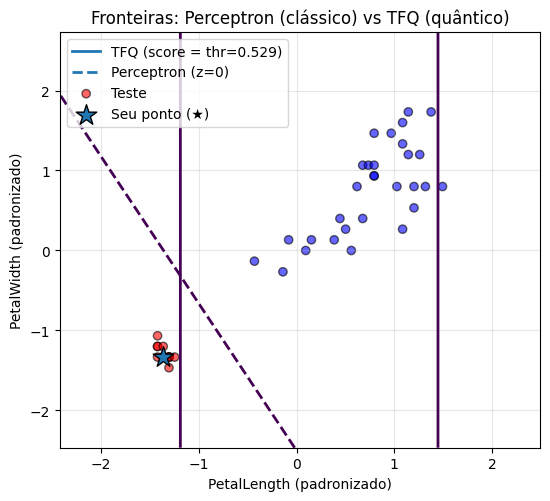

In [31]:
# --- PLOT ROBUSTO: Perceptron (z=0) vs TFQ (score=thr_used) -------------------
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Define thr_used using the previously calculated best_threshold
thr_used = best_threshold

# 1) Malha no espaço padronizado dos CLÁSSICOS
xx, yy = np.meshgrid(
    np.linspace(Xte_sc[:,0].min()-1, Xte_sc[:,0].max()+1, 240),
    np.linspace(Xte_sc[:,1].min()-1, Xte_sc[:,1].max()+1, 240),
)
grid_sc  = np.c_[xx.ravel(), yy.ravel()]
grid_real = classic_scaler.inverse_transform(grid_sc)  # desfaz padronização p/ TFQ

# 2) Perceptron: z = w·x + b no espaço padronizado
w = getattr(perc, 'coef_', np.array([[0,0]]) )[0]
b = getattr(perc, 'intercept_', np.array([0]) )[0]
z_classic = (grid_sc @ w + b).reshape(xx.shape)

# 3) TFQ: score na malha (atenção ao batch para acelerar)
grid_scores_q = []
batch = 1024
for i in range(0, len(grid_real), batch):
    chunk = grid_real[i:i+batch]
    x_tfq = circuits_from_X(chunk, angle_scaler)
    grid_scores_q.extend(q_model_best.predict(x_tfq, verbose=0).ravel())
grid_scores_q = np.array(grid_scores_q).reshape(xx.shape)

# 4) Plot
plt.figure(figsize=(6.2,5.4))

# Contorno do TFQ no nível 'thr_used', se existir
tfq_has_contour = (grid_scores_q.min() <= thr_used <= grid_scores_q.max())
if tfq_has_contour:
    cs_q = plt.contour(xx, yy, grid_scores_q, levels=[thr_used], linestyles='-', linewidths=2)
else:
    # Se não houver contorno, mostre áreas com preenchimento leve só para referência
    plt.contourf(xx, yy, grid_scores_q, levels=10, alpha=0.15)

# Contorno do Perceptron em z=0 (sempre no espaço padronizado)
cs_p = plt.contour(xx, yy, z_classic, levels=[0.0], linestyles='--', linewidths=2)

# Pontos de teste (no espaço padronizado)
sc_test = plt.scatter(Xte_sc[:,0], Xte_sc[:,1], c=y_test, cmap='bwr', alpha=0.6,
                      edgecolor='k', label='Teste')

# Seu ponto (★) — transforme com o MESMO scaler clássico
pt_sc = classic_scaler.transform(np.array([[x1, x2]], float))
sc_star = plt.scatter(pt_sc[0,0], pt_sc[0,1], marker='*', s=240, edgecolor='k',
                      label='Seu ponto (★)')

plt.title("Fronteiras: Perceptron (clássico) vs TFQ (quântico)")
plt.xlabel("PetalLength (padronizado)")
plt.ylabel("PetalWidth (padronizado)")
plt.grid(alpha=.3)

# 5) LEGENDA por PROXIES (independente de 'collections')
handles = [
    Line2D([], [], linestyle='--', linewidth=2, label='Perceptron (z=0)'),
]
if tfq_has_contour:
    handles.insert(0, Line2D([], [], linestyle='-', linewidth=2,
                              label=f'TFQ (score = thr={thr_used:.3f})'))
# acrescente os scatters reais para aparecerem na legenda
handles.extend([sc_test, sc_star])
plt.legend(handles=handles, loc='best')

plt.show()

In [36]:
import numpy as np, tensorflow as tf, cirq, sympy
import tensorflow_quantum as tfq
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from dataclasses import dataclass

# --- 1) Normalização -> Ângulos (a MESMA do treino) ---
@dataclass
class AngleScaler:
    mu: np.ndarray
    sd: np.ndarray
    clip: float = 3.0
    def transform(self, X):
        Z = (X - self.mu) / (self.sd + 1e-8)
        Z = np.clip(Z, -self.clip, self.clip)
        return (Z / self.clip) * np.pi  # [-pi, pi]

# Se você já tem norm_stats=(mu,sd) do seu treino, use:
try:
    angle_scaler = AngleScaler(mu=norm_stats[0], sd=norm_stats[1])
except NameError:
    # fallback: ajusta a partir de X_train
    mu = X_train.mean(axis=0, keepdims=True)
    sd = X_train.std(axis=0, keepdims=True)
    angle_scaler = AngleScaler(mu, sd)

# --- 2) Codificação dos dados em circuitos ---
def encode_circuit(phi1, phi2, qubits=None):
    """Codifica (x1,x2) -> rotações RX/RZ em dois qubits."""
    if qubits is None:
        qubits = cirq.GridQubit.rect(1, 2)
    q0, q1 = qubits
    c = cirq.Circuit()
    c.append(cirq.rx(phi1)(q0))
    c.append(cirq.rz(phi1)(q0))
    c.append(cirq.rx(phi2)(q1))
    c.append(cirq.rz(phi2)(q1))
    return c

# --- 3) Circuito variacional (depth configurável) ---
def build_variational_circuit(depth=2, single_qubit='rxryrz', entangle='cz'):
    """Gera um circuito parametrizado em 2 qubits: (single_qubit + entangle) x depth."""
    q0, q1 = cirq.GridQubit.rect(1, 2)
    c = cirq.Circuit()
    for l in range(depth):
        # parâmetros por camada e por qubit
        if 'rx' in single_qubit:
            c.append(cirq.rx(sympy.Symbol(f't{l}_q0_rx'))(q0))
            c.append(cirq.rx(sympy.Symbol(f't{l}_q1_rx'))(q1))
        if 'ry' in single_qubit:
            c.append(cirq.ry(sympy.Symbol(f't{l}_q0_ry'))(q0))
            c.append(cirq.ry(sympy.Symbol(f't{l}_q1_ry'))(q1))
        if 'rz' in single_qubit:
            c.append(cirq.rz(sympy.Symbol(f't{l}_q0_rz'))(q0))
            c.append(cirq.rz(sympy.Symbol(f't{l}_q1_rz'))(q1))
        # emaranhamento
        if entangle.lower() == 'cz':
            c.append(cirq.CZ(q0, q1))
        elif entangle.lower() in ('cx','cnot'):
            c.append(cirq.CNOT(q0, q1))
        else:
            raise ValueError("entangle deve ser 'cz' ou 'cx'.")
    readout = cirq.Z(q0)
    return c, readout, (q0, q1)

def build_q_model(depth=2, single_qubit='rxryrz', entangle='cz', lr=0.02):
    var_circ, readout, _ = build_variational_circuit(depth, single_qubit, entangle)
    pqc = tfq.layers.PQC(var_circ, readout)
    inp = tf.keras.Input(shape=(), dtype=tf.string)
    x = pqc(inp)
    out = tf.keras.activations.sigmoid(x)  # expectation -> [0,1]
    model = tf.keras.Model(inputs=inp, outputs=out)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# --- 4) Dados -> TFQ tensors (usando a MESMA normalização) ---
def circuits_from_X(X):
    ang = angle_scaler.transform(X)
    circs = [encode_circuit(a[0], a[1]) for a in ang]
    return tfq.convert_to_tensor(circs)

x_tfq_train = circuits_from_X(X_train)
x_tfq_test  = circuits_from_X(X_test)

# (split de validação para threshold)
X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)
x_tfq_tr  = circuits_from_X(X_tr)
x_tfq_val = circuits_from_X(X_val)

# --- 5) Treino TFQ, depth=2 e padrão rxryrz + CZ ---
q_model_best = build_q_model(depth=2, single_qubit='rxryrz', entangle='cz', lr=0.02)

early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                         restore_best_weights=True)
hist = q_model_best.fit(
    x_tfq_tr, y_tr,
    validation_data=(x_tfq_val, y_val),
    batch_size=16, epochs=200, verbose=0, callbacks=[early]
)

# --- 6) Limiar ótimo (Youden J) na validação ---
y_score_val = q_model_best.predict(x_tfq_val, verbose=0).ravel()
fpr, tpr, thr = roc_curve(y_val, y_score_val)
youden = tpr - fpr
best_idx = int(np.argmax(youden))
best_threshold = float(thr[best_idx])
print(f"✅ Limiar (Youden J) escolhido: {best_threshold:.3f}")


/usr/local/lib/python3.11/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


✅ Limiar (Youden J) escolhido: 0.574


In [37]:
from sklearn.preprocessing import StandardScaler

def predict_point_quantum(x1, x2, model=None, scaler=None, thr=None):
    if model is None:
        model = q_model_best
    if scaler is None:
        scaler = angle_scaler
    if thr is None:
        thr = globals().get('best_threshold', 0.5)
    pt = np.array([[float(x1), float(x2)]], dtype=float)
    ang = scaler.transform(pt)
    circ = tfq.convert_to_tensor([encode_circuit(ang[0,0], ang[0,1])])
    score = float(model.predict(circ, verbose=0).ravel()[0])
    yhat  = int(score >= thr)
    return yhat, score, thr

def predict_all(x1, x2):
    # Clássicos (lembrando que o Perceptron/SVM usam X padronizado!)
    pt = np.array([[x1, x2]], dtype=float)
    pt_sc = classic_scaler.transform(pt)

    # Perceptron
    y_perc = int(perc.predict(pt_sc)[0])

    # SVM
    y_svm = int(svm.predict(pt_sc)[0])
    p_svm = float(svm.predict_proba(pt_sc)[0,1]) if hasattr(svm, "predict_proba") else np.nan

    # Naive Bayes (usamos nos valores reais, sem padronizar)
    y_nb = int(nb_clf.predict(pt)[0])
    p_nb = float(nb_clf.predict_proba(pt)[0,1])

    # TFQ
    y_q, s_q, thr = predict_point_quantum(x1, x2)

    print(f"🧪 Entrada: (PL={x1:.2f} cm, PW={x2:.2f} cm)")
    print(f"Perceptron → y={y_perc}")
    print(f"SVM Linear → y={y_svm},  p(1)={p_svm:.3f}")
    print(f"Naive Bayes → y={y_nb},   p(1)={p_nb:.3f}")
    print(f"TFQ (quântico) → y={y_q},  score≈{s_q:.3f}, thr={thr:.3f}")
    return dict(y_perc=y_perc, y_svm=y_svm, p_svm=p_svm, y_nb=y_nb, p_nb=p_nb,
                y_q=y_q, s_q=s_q, thr=thr)

# 👉 Teste com o seu ponto:
_ = predict_all(1.40, 0.20)


🧪 Entrada: (PL=1.40 cm, PW=0.20 cm)
Perceptron → y=1
SVM Linear → y=1,  p(1)=0.973
Naive Bayes → y=1,   p(1)=1.000
TFQ (quântico) → y=1,  score≈0.589, thr=0.574


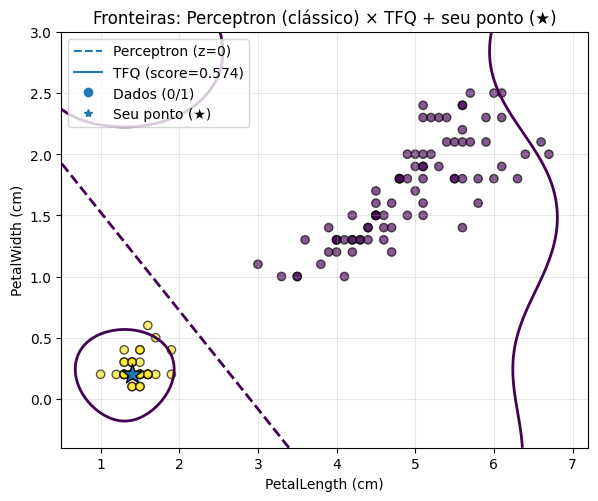

In [38]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# 1) grade em coordenadas reais (cm)
X_all = np.vstack([X_train, X_test])
y_all = np.concatenate([y_train, y_test])

x1_min, x1_max = X_all[:,0].min()-0.5, X_all[:,0].max()+0.5
x2_min, x2_max = X_all[:,1].min()-0.5, X_all[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 240),
                     np.linspace(x2_min, x2_max, 240))
grid_real = np.c_[xx.ravel(), yy.ravel()]

# 2) Perceptron: usa os dados padronizados
grid_sc = classic_scaler.transform(grid_real)
if hasattr(perc, "decision_function"):
    z_classic = perc.decision_function(grid_sc).reshape(xx.shape)
else:
    # fallback visual: previsões (0/1) - 0.5 para criar nível 0
    z_classic = (perc.predict(grid_sc).reshape(xx.shape) - 0.5)

# 3) TFQ: mesma normalização de ângulos do treino
grid_scores_q = q_model_best.predict(
    tfq.convert_to_tensor([encode_circuit(a[0], a[1])
                           for a in angle_scaler.transform(grid_real)]),
    verbose=0
).ravel().reshape(xx.shape)

thr_used = globals().get('best_threshold', 0.5)

# 4) plota
x1, x2 = 1.40, 0.20  # seu ponto

plt.figure(figsize=(6.8, 5.4))
# dados
plt.scatter(X_all[:,0], X_all[:,1], c=y_all, edgecolor='k', alpha=0.65)

# contorno Perceptron (z=0) e TFQ (score=thr)
plt.contour(xx, yy, z_classic, levels=[0.0], linestyles='--', linewidths=2)
plt.contour(xx, yy, grid_scores_q, levels=[thr_used], linestyles='-', linewidths=2)

# seu ponto
plt.scatter([x1], [x2], marker='*', s=220, edgecolor='k')

plt.xlabel('PetalLength (cm)')
plt.ylabel('PetalWidth (cm)')
plt.title('Fronteiras: Perceptron (clássico) × TFQ + seu ponto (★)')
plt.grid(True, alpha=.3)

# legenda robusta (apenas handles manuais)
handles = [
    Line2D([0],[0], linestyle='--'),
    Line2D([0],[0], linestyle='-'),
    Line2D([0],[0], marker='o', linestyle=''),
    Line2D([0],[0], marker='*', linestyle='')
]
labels = ['Perceptron (z=0)', f'TFQ (score={thr_used:.3f})', 'Dados (0/1)', 'Seu ponto (★)']
plt.legend(handles, labels, loc='best')
plt.show()
